In [2]:
import cv2
import skimage.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math

(224, 224, 3)


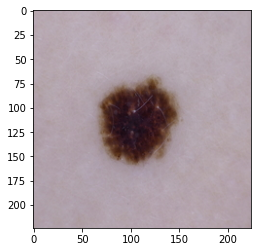

In [13]:
# image = skimage.io.imread('data_set/Amelanotic melanoma364.jpg')
image = skimage.io.imread('data_set/252.jpg')
plt.imshow(image, cmap='gray')
print(image.shape)

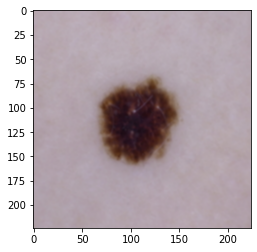

In [14]:
img = cv2.GaussianBlur(image,(3,3),0)
plt.imshow(img)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F) #CV_64F
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


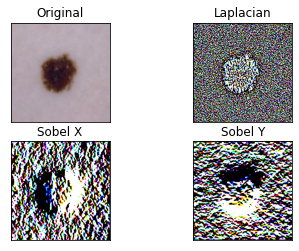

In [15]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

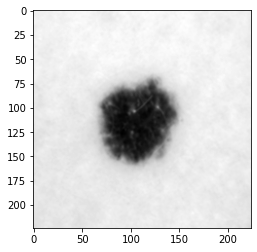

In [16]:
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image -- didnt work due to threshhold value
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(gray, cmap="gray")
plt.show()

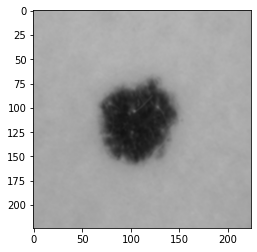

In [17]:
backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
plt.imshow(backtorgb)
plt.show()

In [18]:
# plt.imshow(binary, cmap="gray")
# plt.show()

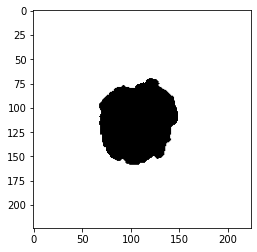

In [19]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap="gray")
plt.show()

In [20]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(blackAndWhiteImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

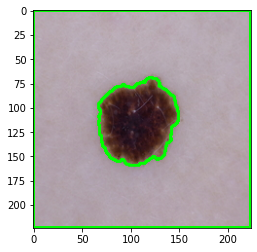

In [21]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

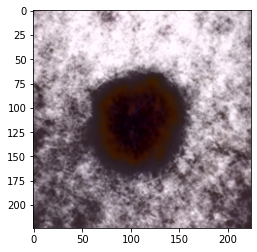

In [22]:
# histogram equalization function
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  
plt.imshow(hist_equalization_result)
plt.show()

In [23]:
# rotate the image
import random 

rows,cols = image.shape[0],image.shape[1]
randDeg = random.randint(-180, 180)
matrix = cv2.getRotationMatrix2D((cols/2, rows/2), randDeg, 0.70)
rotated = cv2.warpAffine(img, matrix, (rows, cols), borderMode=cv2.BORDER_CONSTANT,borderValue=(144, 159, 162))
  

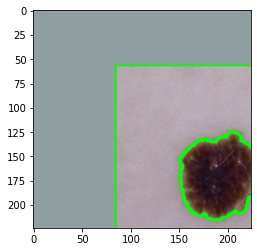

In [24]:
#
img = cv2.warpAffine(image, np.float32([[1, 0, 84], [0, 1, 56]]), (img.shape[0], img.shape[1]),
borderMode=cv2.BORDER_CONSTANT,borderValue=(144, 159, 162))

plt.imshow(img)
plt.show()

In [ ]:
# CNN
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16,(5,5),padding='valid',input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.4))
model.add(Conv2D(32,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.6))
model.add(Conv2D(64,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

batch_size = 100
epochs= 100

optimizer = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras_metrics.precision(), keras_metrics.recall()])

history = model.fit(X_train,y_train,steps_per_epoch = int(len(X_train)/batch_size),epochs=epochs)
history